<a href="https://colab.research.google.com/github/jchoquev/ProyectoTesisUnap/blob/colab/EMPLEO_DESCRIPTIVO_ENAHO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as seaborn
seaborn.__version__

'0.11.1'

In [ ]:
!pip install seaborn=='0.11.1'

In [3]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
import numpy as np


import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt

In [4]:
url=urlopen('http://iinei.inei.gob.pe/iinei/srienaho/descarga/STATA/737-Modulo05.zip')
zipfile=ZipFile(BytesIO(url.read()))

In [16]:
df=pd.read_stata(zipfile.open('737-Modulo05/enaho01a-2020-500.dta'),'ISO-8859-1',preserve_dtypes=True,convert_categoricals=False)

In [17]:
df=df[df.p500i!='00']

In [8]:
df.shape

(91229, 1414)

Horas que trabajó la semana pasada por sexo

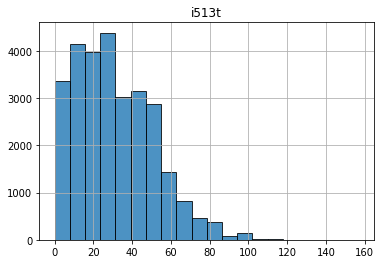

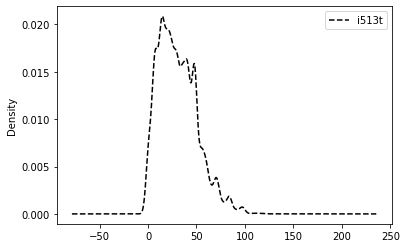

In [9]:
Mujer=df[['i513t']][(df.i513t>=0)&(df.p207==2.0)]
Mujer.hist(bins = 20,histtype = 'bar',align = 'mid',alpha=0.8,edgecolor='black')
Mujer.plot(kind='kde',style='k--')

In [10]:
Mujer.describe()

,i513t
count,28283.000000
mean,30.776333
std,19.940836
min,0.000000
25%,15.000000
50%,28.000000
75%,44.000000
max,157.000000


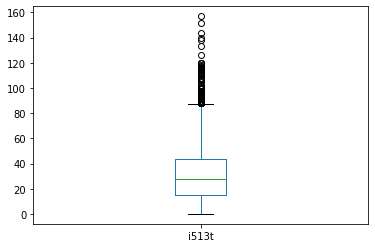

In [11]:
Mujer.plot.box()

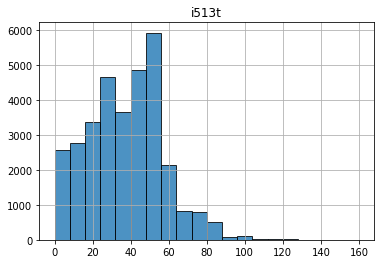

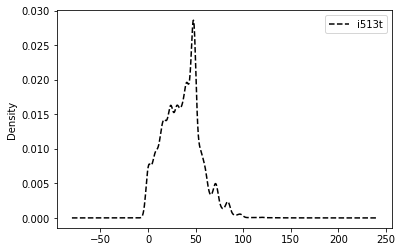

In [12]:
Hombre=df[['i513t']][(df.i513t>=0)&(df.p207==1.0)]
Hombre.hist(bins = 20,histtype = 'bar',align = 'mid',alpha=0.8,edgecolor='black')
Hombre.plot(kind='kde',style='k--')

In [13]:
Hombre.describe()

,i513t
count,32364.00000
mean,35.95903
std,19.69511
min,0.00000
25%,21.00000
50%,36.00000
75%,48.00000
max,160.00000


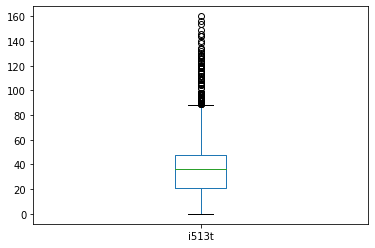

In [14]:
Hombre.plot.box()

Ingreso salarial total percibido el mes pasado por sexo

**OCUPACIÓN PRINCIPAL POR TRABAJO DEPENDIENTE**  
**523**: EN SU OCUPACIÓN PRINCIPAL, ¿A UD. LE PAGAN?  
1:Diario,2:Semanal,3:Quincenal,4:Mensual  
**524**: ¿CUÁNTO FUE SU INGRESO TOTAL EN EL (LA)………...…. ANTERIOR,INCLUYENDO Frecuencia HORAS EXTRAS,BONIFICACIONES, PAGO POR CONCEPTO DE REFRIGERIO, MOVILIDAD, COMISIONES, ETC.?  
**p524ai**: Ingreso total  
**p524e1**: Ingreso Líquido  
**OCUPACIÓN SECUNDARIA POR TRABAJO DEPENDIENTE**  
**538**: ¿CUÁNTO FUE SU INGRESO TOTAL EN EL MES ANTERIOR, INCLUYENDO HORASEXTRAS, BONIFICACIONES, PAGO POR CONCEPTO DE REFRIGERIO, MOVILIDAD, COMISIONES, ETC. EN SU(S) OCUPACIÓN(ES) SECUNDARIA(S)?  
**p538a1**: Ingreso total  
**p538e1**: Ingreso Líquido 
**OCUPACIÓN PRINCIPAL POR TRABAJO INDEPENDIENTE**  
**530**: EN SU OCUPACIÓN PRINCIPAL, ¿CUÁL FUE LA GANANCIA NETA EN EL MES ANTERIOR?  
**p530a**: Monto Soles
**OCUPACIÓN SECUNDARIA POR TRABAJO INDEPENDIENTE**  
**541**: EN SU(S) OCUPACIÓN(ES) SECUNDARIA(S),¿CUÁL FUE SU GANANCIA NETA EN EL MES ANTERIOR?  
**p541a**: Monto Soles

In [80]:
ingreso=df[['p523','p524a1','p524e1','p538a1','p538e1','d524e1','p538e1','p530a','p541a','p207']]

In [51]:
ingreso[(ingreso.IngresoTotal>0.0)&(ingreso.p530a>0.0)]

,p523,p524a1,p524e1,p538a1,p538e1,d524e1,p538e1,p530a,p541a,DFrecuencia,IngresoTotal


In [81]:
ingreso=ingreso.assign(DFrecuencia=ingreso.p523)
ingreso['DFrecuencia']=ingreso['DFrecuencia'].replace({1.0:30,2.0:4,3.0:2,4.0:1,None:np.nan})
ingreso=ingreso.assign(IngresoTotal=(ingreso.p524a1*ingreso.DFrecuencia))
ingreso.loc[ingreso["p530a"] >=0, "IngresoTotal"]=-1
ingreso["IngresoTotal"] = np.where(ingreso["IngresoTotal"]==-1.0,ingreso.p530a, ingreso["IngresoTotal"])
ingreso

,p523,p524a1,p524e1,p538a1,p538e1,d524e1,p538e1,p530a,p541a,p207,DFrecuencia,IngresoTotal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1676.0,NaN,2,NaN,1676.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1269.0,NaN,2,NaN,1269.0
3,4.0,200.0,200.0,NaN,NaN,2433.0,NaN,NaN,NaN,2,1.0,200.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
91310,2.0,210.0,210.0,NaN,NaN,10761.0,NaN,NaN,NaN,1,4.0,840.0
91311,3.0,600.0,600.0,NaN,NaN,14202.0,NaN,NaN,NaN,1,2.0,1200.0
91312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
91313,2.0,150.0,150.0,NaN,NaN,7680.0,NaN,NaN,NaN,1,4.0,600.0


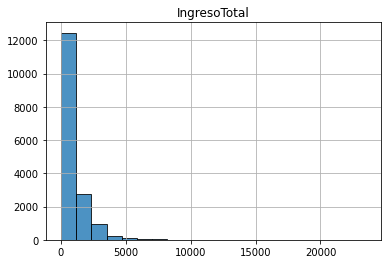

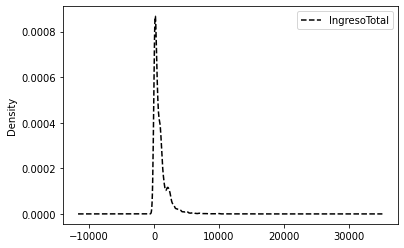

In [92]:
Mujer=ingreso[['IngresoTotal']][(ingreso.p207==2.0)]
Mujer.hist(bins = 20,histtype = 'bar',align = 'mid',alpha=0.8,edgecolor='black')
Mujer.plot(kind='kde',style='k--')

In [86]:
Mujer.describe()

,IngresoTotal
count,16682.000000
mean,909.823343
std,1197.574513
min,1.000000
25%,173.000000
50%,500.000000
75%,1200.000000
max,23452.000000


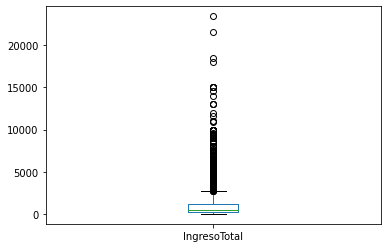

In [87]:
Mujer.plot.box()

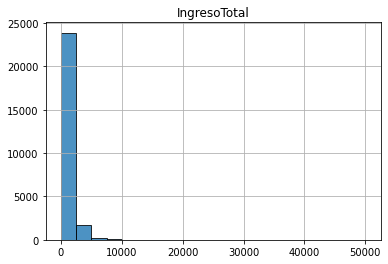

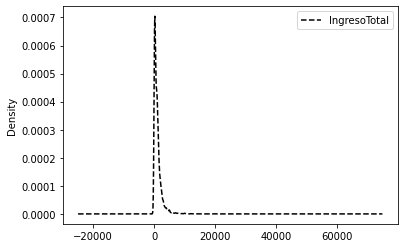

In [91]:
Hombre=ingreso[['IngresoTotal']][(ingreso.p207==1.0)]
Hombre.hist(bins = 20,histtype = 'bar',align = 'mid',alpha=0.8,edgecolor='black')
Hombre.plot(kind='kde',style='k--')

In [89]:
Hombre.describe()

,IngresoTotal
count,25979.000000
mean,1072.924785
std,1416.596770
min,1.000000
25%,250.000000
50%,720.000000
75%,1380.000000
max,50000.000000


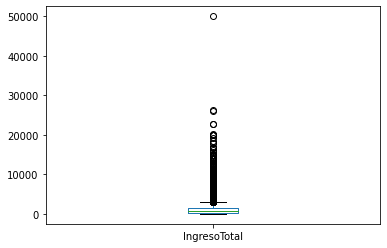

In [90]:
Hombre.plot.box()

In [95]:
ingreso=ingreso.assign(LnIngresoTotal=np.log10(ingreso.IngresoTotal))
ingreso

,p523,p524a1,p524e1,p538a1,p538e1,d524e1,p538e1,p530a,p541a,p207,DFrecuencia,IngresoTotal,LnIngresoTotal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1676.0,NaN,2,NaN,1676.0,3.224274
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1269.0,NaN,2,NaN,1269.0,3.103462
3,4.0,200.0,200.0,NaN,NaN,2433.0,NaN,NaN,NaN,2,1.0,200.0,2.301030
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91310,2.0,210.0,210.0,NaN,NaN,10761.0,NaN,NaN,NaN,1,4.0,840.0,2.924279
91311,3.0,600.0,600.0,NaN,NaN,14202.0,NaN,NaN,NaN,1,2.0,1200.0,3.079181
91312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
91313,2.0,150.0,150.0,NaN,NaN,7680.0,NaN,NaN,NaN,1,4.0,600.0,2.778151


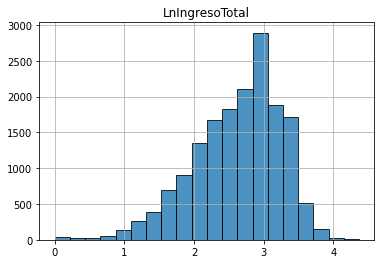

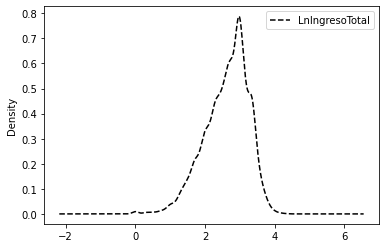

In [96]:
Mujer=ingreso[['LnIngresoTotal']][(ingreso.p207==2.0)]
Mujer.hist(bins = 20,histtype = 'bar',align = 'mid',alpha=0.8,edgecolor='black')
Mujer.plot(kind='kde',style='k--')

In [97]:
Mujer.describe()

,LnIngresoTotal
count,16682.000000
mean,2.623600
std,0.623159
min,0.000000
25%,2.238046
50%,2.698970
75%,3.079181
max,4.370180


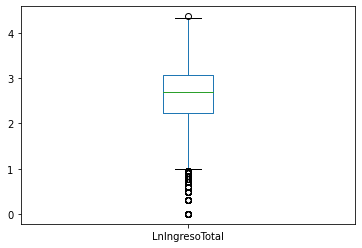

In [98]:
Mujer.plot.box()

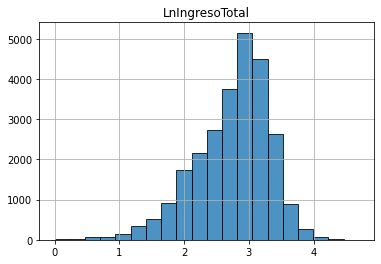

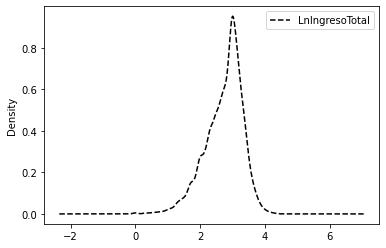

In [99]:
Hombre=ingreso[['LnIngresoTotal']][(ingreso.p207==1.0)]
Hombre.hist(bins = 20,histtype = 'bar',align = 'mid',alpha=0.8,edgecolor='black')
Hombre.plot(kind='kde',style='k--')

In [100]:
Hombre.describe()

,LnIngresoTotal
count,25979.000000
mean,2.740800
std,0.574736
min,0.000000
25%,2.397940
50%,2.857332
75%,3.139879
max,4.698970


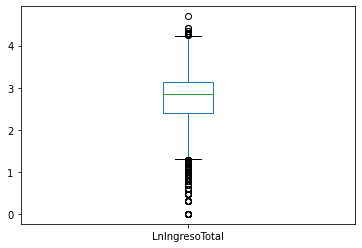

In [101]:
Hombre.plot.box()